In [16]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:

def read_data_from_files(root_folder):
    # 定义需要提取的字段映射
    field_mapping = {
        'GROWTH_DAY': '日龄',
        'HISTORY_TIME': '时间',
        'TARGET_TEMP': '目标温度',
        'HOUSE_TEMP_MIN': '鸡舍温度-最低',
        'HOUSE_TEMP_AVG': '鸡舍温度-平均',
        'HOUSE_TEMP_MAX': '鸡舍温度-最高',
        'TEMP_1_AVG': '温度1-平均',
        'TEMP_2_AVG': '温度2-平均',
        'TEMP_3_AVG': '温度3-平均',
        'TEMP_4_AVG': '温度4-平均',
        'TEMP_5_AVG': '温度5-平均',
        'TEMP_6_AVG': '温度6-平均',
        'OUTSIDE_AVG': '外部-平均',
        'HUMIDITY_IN_1_AVG': 'Humidity In 1 Avg',
        'HUMIDITY_OUT_AVG': '湿度-外部-平均',
        'WATER_CON': '水',
        'FEED_CON': '饲料',
        'LEVEL': '水平'
    }

    # 定义最终需要的字段
    final_fields = [
        '日龄', '时间', '目标温度', '鸡舍温度-最低', '鸡舍温度-平均',
        '鸡舍温度-最高', '温度1-平均', '温度2-平均', '温度3-平均',
        '温度4-平均', '温度5-平均', '温度6-平均', '外部-平均',
        'Humidity In 1 Avg', '湿度-外部-平均', '水', '饲料', '水平',
        'id_no', 'house_no'
    ]

    # 用于存储所有符合条件的数据
    all_data = []

    # 遍历最外层文件夹
    # root_folder = 'your_folder_path'  # 请替换为实际的文件夹路径
    for farm_folder in os.listdir(root_folder):
        if farm_folder.startswith('G'):
            farm_path = os.path.join(root_folder, farm_folder)
            id_no = farm_folder

            # 处理包含xls文件的情况
            for file in os.listdir(farm_path):
                if file.endswith('.xls') and 'H' in file:
                    file_path = os.path.join(farm_path, file)
                    # 提取鸡舍名称
                    house_no = os.path.splitext(file)[0].split('H')[-1]
                    house_no = 'H' + house_no
                    df = pd.read_excel(file_path)
                    df['id_no'] = id_no
                    df['house_no'] = house_no
                    all_data.append(df)


            # 处理包含“EXCEL_Files”文件夹的情况
            excel_files_folder = os.path.join(farm_path, 'EXCEL_Files')
            if os.path.exists(excel_files_folder):
                for file in os.listdir(excel_files_folder):
                    if file.endswith('.xlsx') and file.startswith('H'):
                        file_path = os.path.join(excel_files_folder, file)
                        # 提取鸡舍名称
                        house_no = file.split('-')[0]
                        # 读取指定工作表中的数据
                        df = pd.read_excel(file_path, sheet_name='History View')
                        # 重命名列
                        df = df.rename(columns=field_mapping)
                        df['id_no'] = id_no
                        df['house_no'] = house_no
                        all_data.append(df)

    # 合并所有数据
    if all_data:
        merged_df = pd.concat(all_data, ignore_index=True)
        # 确保最终的 DataFrame 包含所有需要的字段
        merged_df = merged_df.reindex(columns=final_fields)
        # # 保存合并后的数据到一个新的 Excel 文件
        # merged_df.to_excel('merged_result.xlsx', index=False)
        # print('数据合并完成，结果已保存到 merged_result.xlsx')
    else:
        print('未找到符合条件的数据')
    
    return merged_df

In [3]:
root_folder='c:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\24.12 2\\环控数据'
merge_df1=read_data_from_files(root_folder)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but 

In [4]:
root_folder='c:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\25.01\\环控数据'
merge_df2=read_data_from_files(root_folder)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but 

In [5]:
root_folder='c:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\25.02\\环控数据-2502\\环控数据-2502'
merge_df3=read_data_from_files(root_folder)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but 

In [6]:
root_folder='c:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\25.03\\2503-环控'
merge_df4=read_data_from_files(root_folder)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but 

In [7]:
all_HumTem_data=pd.concat([merge_df1,merge_df2,merge_df3,merge_df4])
all_HumTem_data=all_HumTem_data.reset_index(drop=True)

In [8]:
all_HumTem_data['house_no']=all_HumTem_data['house_no'].map(lambda x:re.sub(r'[\u4e00-\u9fa5]', '', x))
all_HumTem_data['house_no']=all_HumTem_data['house_no'].map(lambda x :x.split('-')[0])
all_HumTem_data['id_no']=all_HumTem_data['id_no'].str[1:]


In [50]:
all_HumTem_data.to_csv('C:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\data_cleaned\\all_HumTem_data_fromHKdata.csv',index=False)

In [32]:
df=all_HumTem_data.copy()
# 需要转换为数值类型的字段
numeric_columns = [
    '鸡舍温度-最低', '鸡舍温度-平均', '鸡舍温度-最高',
    '温度1-平均', '温度2-平均', '温度3-平均',
    '温度4-平均', '温度5-平均', '温度6-平均',
    '外部-平均', 'Humidity In 1 Avg', '湿度-外部-平均',
    '水', '饲料', '水平'
]

# 将需要统计的字段转换为数值类型
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
# 将日龄列转换为数值类型
df['日龄'] = pd.to_numeric(df['日龄'], errors='coerce')

# 按 house_no、id_no 和日龄分组，进行统计
grouped = df.groupby(['house_no', 'id_no', '日龄'])
aggregated = grouped.agg({
    '鸡舍温度-最高': 'max',
    '鸡舍温度-最低': 'min',
    '鸡舍温度-平均': 'mean',
    'Humidity In 1 Avg': 'mean'
}).reset_index()

# 计算每日温差
aggregated['每日温差'] = aggregated['鸡舍温度-最高'] - aggregated['鸡舍温度-最低']

# 按 house_no、id_no 和日龄排序
aggregated = aggregated.sort_values(by=['house_no', 'id_no', '日龄'])

# 定义计算变化率的函数
def calculate_cumulative_rate(group, col):
    values = group[col]
    initial_value = values.iloc[0]
    return (values - initial_value) / initial_value

# 计算截止到当前日龄的每日变化率
aggregated['鸡舍温度-最低变化率'] = aggregated.groupby(['house_no', 'id_no']).apply(
    calculate_cumulative_rate, col='鸡舍温度-最低').reset_index(level=[0, 1], drop=True)
aggregated['鸡舍温度-最高变化率'] = aggregated.groupby(['house_no', 'id_no']).apply(
    calculate_cumulative_rate, col='鸡舍温度-最高').reset_index(level=[0, 1], drop=True)
aggregated['鸡舍温度-平均变化率'] = aggregated.groupby(['house_no', 'id_no']).apply(
    calculate_cumulative_rate, col='鸡舍温度-平均').reset_index(level=[0, 1], drop=True)

In [33]:
# 字段名映射
field_mapping = {
    'house_no': 'HouseNo',
    'id_no': 'id_no',
    '日龄': 'Age',
    '鸡舍温度-最高': 'MaxHouseTemperature',
    '鸡舍温度-最低': 'MinHouseTemperature',
    '鸡舍温度-平均': 'AvgHouseTemperature',
    'Humidity In 1 Avg': 'AvgHumidityIn1',
    '每日温差': 'DailyTemperatureDifference',
    '鸡舍温度-最低变化率': 'MinHouseTemperatureChangeRate',
    '鸡舍温度-最高变化率': 'MaxHouseTemperatureChangeRate',
    '鸡舍温度-平均变化率': 'AvgHouseTemperatureChangeRate'
}

# 重命名列
aggregated = aggregated.rename(columns=field_mapping)

<AxesSubplot:xlabel='Age'>

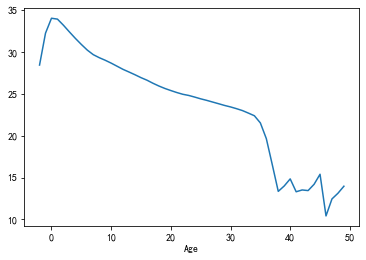

In [34]:
aggregated.groupby(['Age'])['AvgHouseTemperature'].mean().plot()

In [26]:
aggregated.groupby(['Age'])['AvgHouseTemperature'].mean().tail(20)

Age
30    23.452861
31    23.244222
32    23.014615
33    22.712588
34    22.395699
35    21.538686
36    19.657973
37    16.532304
38    13.341772
39    13.990798
40    14.836703
41    13.295201
42    13.512055
43    13.437897
44    14.187285
45    15.391667
46    10.404167
47    12.437500
48    13.116667
49    13.960000
Name: AvgHouseTemperature, dtype: float64

In [29]:
# 删除37天以后的数据
aggregated=aggregated[(aggregated['Age']<=36) ]

In [30]:
aggregated.to_csv('C:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\data_cleaned\\HumTem_data_agg.csv',index=False)